In [3]:
# Lab Part 1_1

import pandas as pd

data = pd.read_csv('vTargetMailCustomer.csv', encoding='latin1')

selected_features = ['CustomerKey', 'Gender', 'TotalChildren', 'EnglishOccupation', 'NumberCarsOwned', 'CommuteDistance', 'Age', 'BikeBuyer']

target_buyers = data[selected_features]

target_buyers.to_csv('vTargetBuyers.csv', index=False)

In [4]:
# Lab part 1_2

import numpy as np
data = pd.read_csv('vTargetBuyers.csv')

for feature in selected_features:
    
    unique_values = data[feature].unique()
    num_unique_values = len(unique_values)
    data_type = data[feature].dtype
    min_val = min(unique_values)
    
    if(isinstance(min_val , (np.int64, np.float64))):
        if min_val == 0:
            feature_type = "Ratio"
        elif min_val > 0:
            feature_type = "Interval"
        else:
            feature_type = "Ordinal" 
    else:
        if num_unique_values == len(data):
            feature_type = 'Nominal'
        else:
            feature_type = 'Ordinal'

    
    if feature_type == 'Interval' or feature_type == 'Ratio':
        if data[feature].nunique() / len(data) < 0.05:  
            data_category = 'Discrete'
        else:
            data_category = 'Continuous'
    else:
        data_category = 'Unknown'  

    print(f"Feature: {feature}, Property: {feature_type}, Data Type: {data_category}")

Feature: CustomerKey, Property: Interval, Data Type: Continuous
Feature: Gender, Property: Ordinal, Data Type: Unknown
Feature: TotalChildren, Property: Ratio, Data Type: Discrete
Feature: EnglishOccupation, Property: Ordinal, Data Type: Unknown
Feature: NumberCarsOwned, Property: Ratio, Data Type: Discrete
Feature: CommuteDistance, Property: Ordinal, Data Type: Unknown
Feature: Age, Property: Interval, Data Type: Discrete
Feature: BikeBuyer, Property: Ratio, Data Type: Discrete


Feature: TotalChildren, Mean: 1.8443518718892016, Variance: 2.5998593483429993, Standard Deviation: 1.6124079348424825


/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


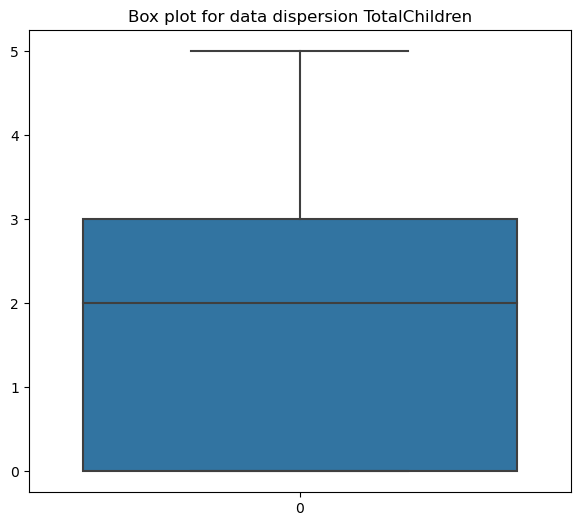


Normalized data: 
   TotalChildren
0            0.4
1            0.6
2            0.6
3            0.0
4            1.0

Standardized data: 
   TotalChildren
0       0.096534
1       0.716741
2       0.716741
3      -1.143880
4       1.957156


/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Feature: NumberCarsOwned, Mean: 1.5027050421986583, Variance: 1.2959403099006872, Standard Deviation: 1.1383937411549165


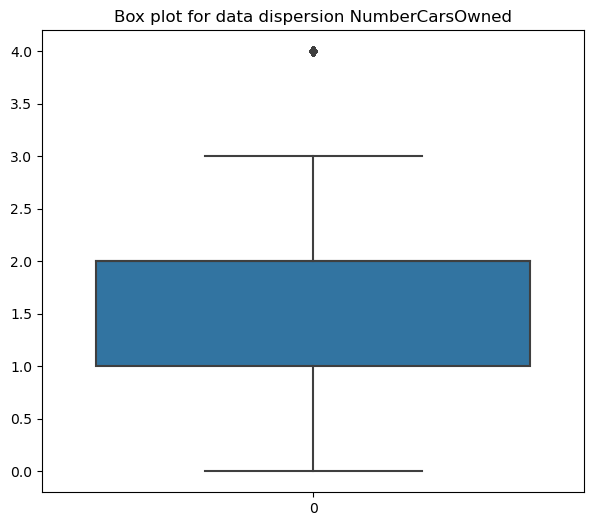


Normalized data: 
   NumberCarsOwned
0         0.000000
1         0.333333
2         0.333333
3         0.333333
4         0.666667

Standardized data: 
   NumberCarsOwned
0        -1.465913
1        -0.392976
2        -0.392976
3        -0.392976
4         0.679960


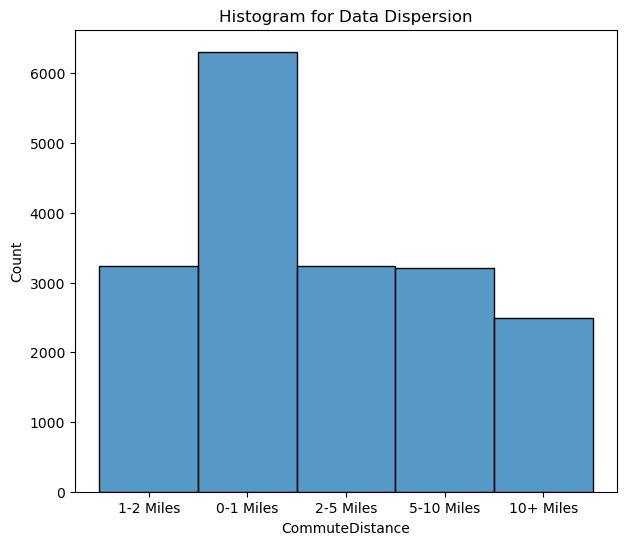

Feature: Age, Mean: 53.135793118372646, Variance: 126.81778711642396, Standard Deviation: 11.261340378321933


/Users/fibu/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Normalized data: 
        Age
0  0.288462
1  0.307692
2  0.307692
3  0.250000
4  0.250000

Standardized data: 
        Age
0 -0.362971
1 -0.272255
2 -0.272255
3 -0.544403
4 -0.544403


In [11]:
# Lab Part 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from scipy.stats import zscore

# Initializing scaler objects
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Created list to store categorical features
categorical_features = []

data = pd.read_csv('VTargetBuyers.csv')
bike_buyer = 'BikeBuyer'

for feature in selected_features:
    
    unique_values = data[feature].unique()
    data_type = data[feature].dtype
    
    if feature == bike_buyer or feature == 'CustomerKey':
        continue
    
    random_sampling = np.random.choice(data[feature], size = int(0.7 * len(data[feature])), replace = False)
    bootstrap_sampling = np.random.choice(data[feature], size = int(0.7 * len(data[feature])), replace = True)
    
    if data_type == int or data_type == float:
        
        # Handling null values
        data[feature] = data[feature].fillna(data[feature].mean())
        
        # Getting Mean/Variance/SD
        mean = data[feature].mean()
        variance = data[feature].var()
        sd_values = data[feature].std()
        print(f"Feature: {feature}, Mean: {mean}, Variance: {variance}, Standard Deviation: {sd_values}")
        
        plt.figure(figsize=(7, 6))
        sns.boxplot(data=data[feature])
        plt.title(f"Box plot for data dispersion {feature}")
        plt.show()
        
        data_zscores = zscore(data[feature])
        
        plt.scatter(data_zscores.index, data_zscores.values)
        plt.title(f"Z-score for {feature}")
        plt.xlabel("Index")
        plt.ylabel("Z-score")
        plt.show()
        
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
        data.loc[(data[feature] < lower_bound) | (data[feature] > upper_bound), feature] = data[feature].median()
        
        # Normalizing the data
        data_normalized = scaler_minmax.fit_transform(data[[feature]])
        data_normalized = pd.DataFrame(data_normalized, columns=[feature])
    
        print("\nNormalized data: ")
        print(data_normalized.head())
        
        # Standardization
        data_standardized = scaler_standard.fit_transform(data[[feature]])
        data_standardized = pd.DataFrame(data_standardized, columns=[feature])
    
        print("\nStandardized data: ")
        print(data_standardized.head())
        
       
        
    else:
        plt.figure(figsize=(7, 6))
        sns.histplot(data=data[feature])
        plt.title("Histogram for Data Dispersion")
        plt.show()
        
        # OneHotEncoding
        encoding = OneHotEncoder(sparse=False)
        encoded_features = encoding.fit_transform(data[[feature]])
        
        new_columns = [f"{feature}_{category}" for category in encoding.categories_[0]]
    
        encoded_df = pd.DataFrame(encoded_features, columns=new_columns)
    
        data = pd.concat([data, encoded_df], axis=1)
    
        data.drop(columns=[feature], inplace=True)
        
data.to_csv("preprocessed_data.csv", index=False)